In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gameanalysis import rsgame, paygame, nash, learning
import numpy as np
import time
import matplotlib.pyplot as plt
import colabutils
import environment.wrapper as wrapper
from environment import colabenv
import tqdm
import experiment

In [3]:
np.set_printoptions(precision=2, suppress=True)

## NE Experiment w/ Same Payoff Weights

In [188]:
from environment.colabenv import ColabSim
from environment.colabagent import ColabCtrlAgent

In [200]:
# Parameters
penalty_weight = np.array([[2,50,1.5],[2,50,1.5]])
time_limit = 100
# Simulate and create game
sim = colabenv.ColabSim(2,2,time_limit=time_limit, penalty_weight=penalty_weight)
players = [1,1]
strategies = [8,8]
g = rsgame.empty(players, strategies)
profiles = g.all_profiles()
payoffs = np.zeros(profiles.shape)
for i,p in enumerate(profiles):
    payoffs[i] = ( -colabutils.estimate_payoff(sim, p, n=1) )
payoffs = np.array(payoffs)
pg = paygame.game(players, strategies, profiles, payoffs)

In [201]:
ne = nash.fictitious_play(pg, prof=pg.random_mixture())
ne

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

## Draw payoff table

In [202]:
S = 8
table1 = np.zeros((8,8))
table2 = np.zeros((8,8))
for i, p in enumerate(profiles):
    num1 = np.where(p[:S]==1)[0][0]
    num2 = np.where(p[S:]==1)[0][0]
    table1[num1, num2] = payoffs[i][:S].min()
    table2[num1, num2] = payoffs[i][S:].min()

In [203]:
print(table1)

[[ -944.05 -1094.66  -970.07 -1221.37 -1066.22 -1098.68  -956.99 -1190.31]
 [ -747.07 -1136.8   -782.7  -1107.49  -765.98  -995.06  -780.51 -1001.89]
 [ -938.23  -908.8   -994.49 -1933.46  -979.17  -906.81  -969.84 -1344.73]
 [ -845.82  -973.84 -1097.56 -1755.95  -879.17  -889.81  -983.45 -1612.36]
 [ -955.59 -1131.6   -929.49 -1156.9  -1382.92 -1082.9  -1372.63 -1544.96]
 [ -770.05 -1023.32  -747.41  -969.51 -1166.48 -1305.59 -1222.12 -1249.  ]
 [ -920.58  -900.26 -1129.48 -1990.27 -1468.57 -1308.42 -1505.79 -1942.99]
 [ -827.93  -858.76  -934.49 -1626.49 -1365.96 -1152.07 -1367.39 -2460.63]]


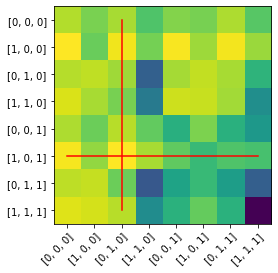

In [204]:
labels = [str(colabutils.number_to_strat(i)) for i in range(8)]
fig, ax = plt.subplots()
im = ax.imshow(table1)

# We want to show all ticks...
ax.set_xticks(np.arange(S))
ax.set_yticks(np.arange(S))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
# Rotate the tick labels and set their alignment.
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Plot Eq
p1_ne_strats = np.arange(8)[ne[:8] > 1e-2]
p2_ne_strats = np.arange(8)[ne[8:] > 1e-2]
for i in p1_ne_strats:
    plt.plot([0,7],[i,i], 'r', alpha=ne[i])
for j in p2_ne_strats:
    plt.plot([j,j],[0,7], 'r', alpha=ne[8+j])

## NE Strategy

In [182]:
def find_nash(sim):
    players = [1,1]
    strategies = [8,8]
    g = rsgame.empty(players, strategies)
    profiles = g.all_profiles()
    payoffs = np.zeros(profiles.shape)
    for i,p in enumerate(profiles):
        payoffs[i] = ( -colabutils.estimate_payoff(sim, p, n=1) )
    payoffs = np.array(payoffs)
    pg = paygame.game(players, strategies, profiles, payoffs)
    ne = nash.fictitious_play(pg, prof=pg.random_mixture())
    return ne

In [185]:
find_nash(sim)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])